#Importing and installing the required libraries

In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
import pickle
#import time 

import tensorflow as tf

import keras
from google.colab import drive

#Mounting the google drive to the colab 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Creating the Training dataset

In [6]:
training_data =[]
src_path= "/content/drive/MyDrive/Dataset/leaves"
subclass=os.listdir(src_path)
def create_training_data():
    for sclass in subclass:
        path=os.path.join(src_path,sclass)
        class_num=subclass.index(sclass)
        for img in tqdm(os.listdir(path)):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array, (224,224))
            training_data.append([new_array,class_num])
            
create_training_data()
print(len(training_data))

100%|██████████| 105/105 [00:13<00:00,  7.83it/s]

420


In [7]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,224,224,1)
print(X[0])

[[[251]
  [251]
  [251]
  ...
  [253]
  [251]
  [252]]

 [[252]
  [251]
  [251]
  ...
  [253]
  [251]
  [252]]

 [[251]
  [252]
  [251]
  ...
  [253]
  [251]
  [251]]

 ...

 [[251]
  [251]
  [249]
  ...
  [252]
  [249]
  [249]]

 [[251]
  [250]
  [248]
  ...
  [251]
  [249]
  [249]]

 [[251]
  [250]
  [251]
  ...
  [251]
  [248]
  [249]]]


# Preprocessing data and pickling them for future use 

In [8]:
import pickle 
pickle_out = open("X_Augumented_Grayscale","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_Augumented_Grayscale","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#CNN model


In [9]:
#pip install tf-nightly --user

In [10]:
import tensorflow as tf

import keras

pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_2"

model=Sequential()

model.add(Conv2D(100,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(250,(5,5),padding="same",strides=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])


Epoch 1/10
336/336 [==============================] - 14s 39ms/step - loss: 1.2567 - accuracy: 0.4702 - val_loss: 3.5894 - val_accuracy: 0.0000e+00
Epoch 2/10
336/336 [==============================] - 15s 43ms/step - loss: 0.7028 - accuracy: 0.6696 - val_loss: 0.8726 - val_accuracy: 0.6905
Epoch 3/10
336/336 [==============================] - 12s 37ms/step - loss: 0.4434 - accuracy: 0.8125 - val_loss: 1.1194 - val_accuracy: 0.6786
Epoch 4/10
336/336 [==============================] - 12s 37ms/step - loss: 0.3368 - accuracy: 0.8423 - val_loss: 1.3205 - val_accuracy: 0.6786
Epoch 5/10
336/336 [==============================] - 12s 35ms/step - loss: 0.2661 - accuracy: 0.8899 - val_loss: 1.4826 - val_accuracy: 0.6905
Epoch 6/10
336/336 [==============================] - 12s 35ms/step - loss: 0.2434 - accuracy: 0.8988 - val_loss: 1.5975 - val_accuracy: 0.6786
Epoch 7/10
336/336 [==============================] - 12s 35ms/step - loss: 0.1866 - accuracy: 0.9196 - val_loss: 1.0163 - val_accur

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 100)     2600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 100)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 100)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 250)       625250    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 250)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 250)         0

#Saving the model

In [12]:
model.save("/content/drive/MyDrive/Dataset/mod./CNN_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/CNN_model/assets


In [13]:
model.save("/content/drive/MyDrive/Dataset/mod./CNN_h5_model.h5")

In [14]:
# pick = open("model_pickel","wb")
# pickle.dump(history, pick)
# pick.close()

#Testing predictions on model


In [27]:
model = keras.models.load_model("/content/drive/MyDrive/Dataset/mod/CNN_h5_model.h5")

In [28]:
from tensorflow.keras.preprocessing import image

def prediction(img):
    img = image.img_to_array(img)
    img = img.reshape(-1, 224, 224, 1)
    img = img.astype('float32')
    img = img/255.0
    
    return np.argmax(model.predict(img),axis=-1)[0]

In [29]:
labels=["Ulmus Carpinifolia","Eucalyptus Globulus", "Populus Tremula(Aspen)", "Ulmus Glabra"]

In [30]:
path = "/content/drive/MyDrive/Dataset/leaves/leaf7/l7nr018.tif"
img = image.load_img(path,target_size=(224,224),color_mode="grayscale")

#Input image

Input image:


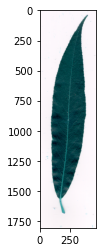

In [31]:
print("Input image:")

img_path=cv2.imread(path)
plt.imshow(img_path, cmap='gray')
plt.show()


#Output and the matched image

Actual Matched image:


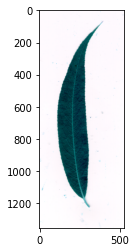

Eucalyptus Globulus


In [32]:
print("Actual Matched image:")

res_path=cv2.imread("/content/drive/MyDrive/Dataset/"+labels[prediction(img)]+".tif")
plt.imshow(res_path, cmap='gray')
plt.show()

print(labels[prediction(img)])